In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.integrate import solve_ivp
%matplotlib inline
import Optimisation
from importlib import reload
reload(Optimisation)
from Optimisation import *




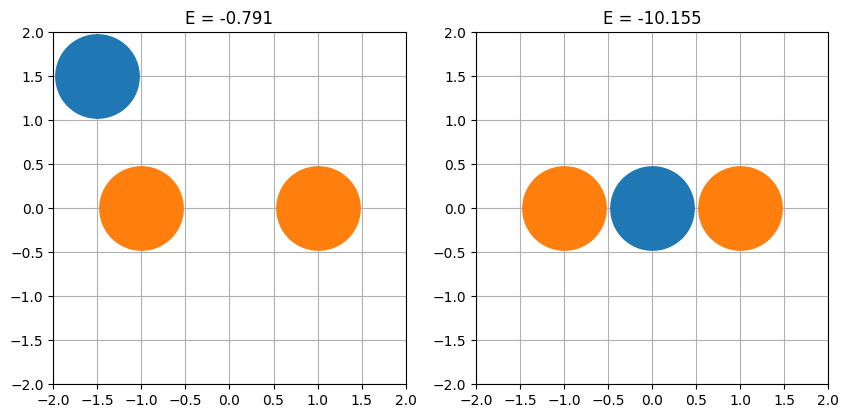

In [15]:
#Define three points:
static_points= np.array([[-1, 0], [1,0]])
points = np.array([[-1, 0], [1,0], [-1.5, 1.5]])
points2 = np.array([[-1, 0], [1,0], [0,0]])

LJ_Potential = LennardJones()


fig, ax = plt.subplots(1,2, figsize = (10,5))

for point, ax in zip([points, points2], ax):
    ax.plot(point[-1,0], point[-1,1], 'o', ms = 60)
    ax.plot(point[:2,0], point[:2,1],'o', ms = 60)
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_aspect('equal')
    ax.grid(zorder = 10)
    LJ_Potential.energy(point)
    ax.set_title(f'E = {LJ_Potential.energy(point):.3f}')




In [43]:
static_points= np.array([[-1, 0], [1,0]])
x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)

Xs, Ys = np.meshgrid(x,y)

Zs = np.zeros_like(Xs)
for i in range(len(x)):
    for j in range(len(y)):
        Zs[i,j] = LJ_Potential.energy(np.array([[Xs[i,j], Ys[i,j]], static_points[0], static_points[1]]))
        if Zs[i,j] > 0:
            Zs[i,j] = 0



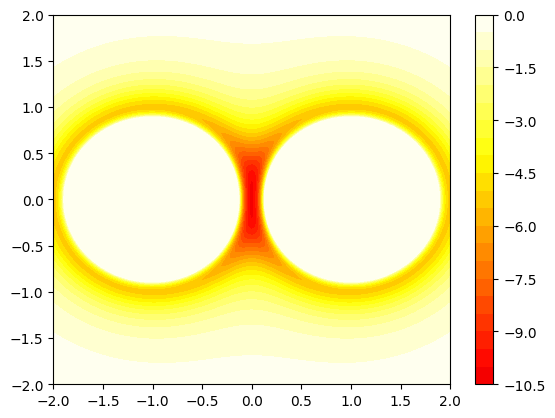

In [57]:
fig, ax = plt.subplots()
contour = ax.contourf(Xs, Ys, Zs, vmin = -15.75, vmax = 0, cmap = 'hot', levels = 20, extent=[-0.5, 0.5, -0.5, 0.5]) 
plt.colorbar(contour)


In [ ]:
LJ_optimizer = Potential(V = LJ_Potential, kT = 0.15, x_range=[-2, 2])